<a href="https://colab.research.google.com/github/mttkn-dt/23F24754-AIDL-Assignment/blob/main/MTTKNBikevCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [38]:
train_dir = '/content/drive/MyDrive/data/Train'
test_dir = '/content/drive/MyDrive/data/Test'

In [39]:
# number of images
import os
print("Training")
print(len(os.listdir('/content/drive/MyDrive/data/Train/cars')))
print(len(os.listdir('/content/drive/MyDrive/data/Train/bikes')))
print("Testing")
print(len(os.listdir('/content/drive/MyDrive/data/Test/cars')))
print(len(os.listdir('/content/drive/MyDrive/data/Test/bikes')))

Training
726
998
Testing
80
80


In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [41]:
training_dataset = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    labels='inferred', # bikes class assigned 0, cars class assigned 1
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  # resizing images
)

Found 1861 files belonging to 2 classes.


In [42]:
testing_dataset = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 160 files belonging to 2 classes.


In [43]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

training_dataset = training_dataset.map(process)
testing_dataset = testing_dataset.map(process)


In [44]:
# creation of Convoletional Neural Network model
model = Sequential()

In [45]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.add(Flatten())

In [47]:
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

In [48]:
from keras.optimizers import Adam

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [50]:
history = model.fit(training_dataset,epochs=10,validation_data=testing_dataset)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.6132 - loss: 0.6638 - val_accuracy: 0.8625 - val_loss: 0.4016
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.8857 - loss: 0.2836 - val_accuracy: 0.9125 - val_loss: 0.2687
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.9544 - loss: 0.1345 - val_accuracy: 0.9187 - val_loss: 0.2975
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.9786 - loss: 0.0659 - val_accuracy: 0.9125 - val_loss: 0.3757
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9908 - loss: 0.0266 - val_accuracy: 0.8562 - val_loss: 0.5623
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9855 - loss: 0.0373 - val_accuracy: 0.8687 - val_loss: 0.5046
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.9899 - loss: 0.0232 - val_accuracy: 0.8813 - val_loss: 0.6183
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8875 - v

In [52]:
import matplotlib.pyplot as plt

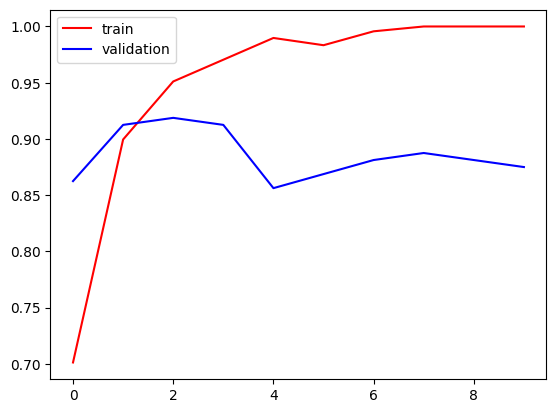

In [53]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

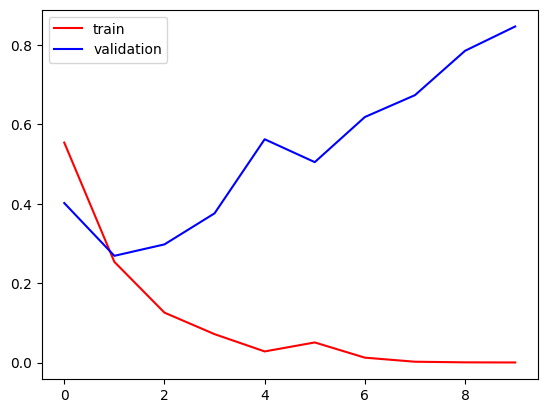

In [54]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [58]:
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[0.]], dtype=float32)

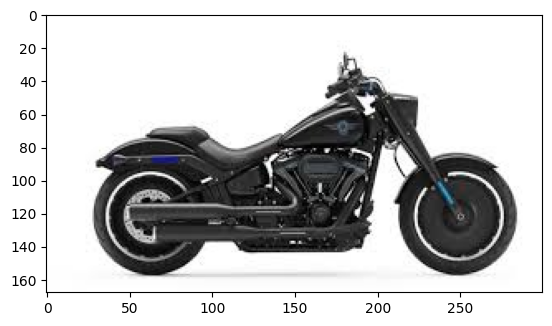

In [56]:
# Testing Bike Image


test_img = cv2.imread(r'/content/drive/MyDrive/data/Test/bikes/Bike (807).jpeg')

plt.imshow(test_img)

test_img.shape

test_img = cv2.resize(test_img,(256,256))

test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)  # 0 refering to bike and 1 refering to car

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[1.]], dtype=float32)

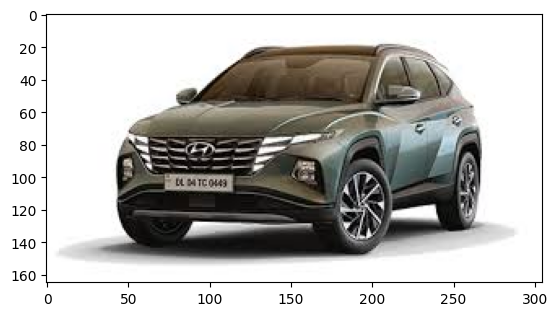

In [57]:
# Test Car Image
test_img2 = cv2.imread(r'/content/drive/MyDrive/data/Test/cars/Car (811).jpeg')

plt.imshow(test_img2)

test_img2= cv2.resize(test_img2,(256,256))

test_input = test_img2.reshape((1,256,256,3))
model.predict(test_input)  # 0 refering to bike and 1 refering to car